<a href="https://colab.research.google.com/github/Daivar/Deep_Learning_Models/blob/main/Stock_prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib  as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

In [4]:
data_url = 'https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/09_Sequential_Data_Analysis/NSE-Tata-Global-Beverages-Limited.csv'
df = pd.read_csv(data_url)
# df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
# df.index=df['Date']
df = df[::-1]
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [5]:
len(df)

2035

In [11]:
# data=df.sort_index(ascending=False,axis=0)
data=df.sort_index(ascending=False, axis=0).reset_index(drop=True)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

train_data = new_dataset[0:987]
valid_data = new_dataset[987:]

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

new_dataset.tail(5)

,Close
Date,
2018-09-24,233.3
2018-09-25,236.1
2018-09-26,234.25
2018-09-27,233.25
2018-09-28,233.75


In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)

# construct the sequences: we will try to predict y
# ... based on last 60 values of x
x_train_data,y_train_data=[],[]
for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

# convert to numpy
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
print(x_train_data.shape)

# reshape it to 3D
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

# to see how the shape changes we can again print it out
print(x_train_data.shape)
print(y_train_data.shape)

(927, 60)
(927, 60, 1)
(927,)


In [13]:
print(x_train_data[0])
print(y_train_data[0])

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 [0.14971405]
 [0.15400327]
 [0.15236928]
 [0.14562908]
 [0.14338235]
 [0.14848856]
 [0.15257353]
 [0.14522059]
 [0.13521242]
 [0.12724673]
 [0.13031046]
 [0.12806373]
 [0.13459967]
 [0.12908497]
 [0.13562092]
 [0.12377451]
 [0.1190768 ]
 [0.11397059]
 [0.13112745]
 [0.12479575]
 [0.14603758]
 [0.14501634]
 [0.14726307]
 [0.15196078]
 [0.1503268 ]
 [0.14971405]
 [0.16156046]
 [0.17177288]
 [0.1693219 ]
 [0.16830065]
 [0.17238562]
 [0.19097222]
 [0.18913399]
 [0.19138072]
 [0.18382353]
 [0.17544935]
 [0.17279412]
 [0.16830065]
 [0.17034314]
 [0.17810458]
 [0.16973039]
 [0.16278595]
 [0.17401961]
 [0.18035131]
 [0.17422386]
 [0.17116013]
 [0.16564542]
 [0.16033497]
 [0.17381536]
 [0.17851307]
 [0.18811275]
 [0.19750817]
 [0.21425654]
 [0.21098856]
 [0.21772876]
 [0.20445261]
 [0.21568627]]
0.21282679738562094


In [14]:
print(x_train_data[1])
print(y_train_data[1])

[[0.16319444]
 [0.1621732 ]
 [0.14971405]
 [0.15400327]
 [0.15236928]
 [0.14562908]
 [0.14338235]
 [0.14848856]
 [0.15257353]
 [0.14522059]
 [0.13521242]
 [0.12724673]
 [0.13031046]
 [0.12806373]
 [0.13459967]
 [0.12908497]
 [0.13562092]
 [0.12377451]
 [0.1190768 ]
 [0.11397059]
 [0.13112745]
 [0.12479575]
 [0.14603758]
 [0.14501634]
 [0.14726307]
 [0.15196078]
 [0.1503268 ]
 [0.14971405]
 [0.16156046]
 [0.17177288]
 [0.1693219 ]
 [0.16830065]
 [0.17238562]
 [0.19097222]
 [0.18913399]
 [0.19138072]
 [0.18382353]
 [0.17544935]
 [0.17279412]
 [0.16830065]
 [0.17034314]
 [0.17810458]
 [0.16973039]
 [0.16278595]
 [0.17401961]
 [0.18035131]
 [0.17422386]
 [0.17116013]
 [0.16564542]
 [0.16033497]
 [0.17381536]
 [0.17851307]
 [0.18811275]
 [0.19750817]
 [0.21425654]
 [0.21098856]
 [0.21772876]
 [0.20445261]
 [0.21568627]
 [0.2128268 ]]
0.19975490196078427


In [15]:
len(y_train_data)

927

In [16]:
print(list(x_train_data[0]))
print(list(x_train_data[1]))
print(list(x_train_data[2]))

print(y_train_data[0])
print(y_train_data[1])
print(y_train_data[2])

[array([0.16584967]), array([0.16319444]), array([0.1621732]), array([0.14971405]), array([0.15400327]), array([0.15236928]), array([0.14562908]), array([0.14338235]), array([0.14848856]), array([0.15257353]), array([0.14522059]), array([0.13521242]), array([0.12724673]), array([0.13031046]), array([0.12806373]), array([0.13459967]), array([0.12908497]), array([0.13562092]), array([0.12377451]), array([0.1190768]), array([0.11397059]), array([0.13112745]), array([0.12479575]), array([0.14603758]), array([0.14501634]), array([0.14726307]), array([0.15196078]), array([0.1503268]), array([0.14971405]), array([0.16156046]), array([0.17177288]), array([0.1693219]), array([0.16830065]), array([0.17238562]), array([0.19097222]), array([0.18913399]), array([0.19138072]), array([0.18382353]), array([0.17544935]), array([0.17279412]), array([0.16830065]), array([0.17034314]), array([0.17810458]), array([0.16973039]), array([0.16278595]), array([0.17401961]), array([0.18035131]), array([0.1742238

In [17]:
# input shape will be:
(x_train_data.shape[1], 1)

(60, 1)

In [18]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
history = lstm_model.fit(x_train_data,y_train_data, epochs=20, batch_size=50, verbose=1)

Epoch 1/20
19/19 [==============================] - 5s 73ms/step - loss: 0.0073
Epoch 2/20
19/19 [==============================] - 1s 72ms/step - loss: 0.0013
Epoch 3/20
19/19 [==============================] - 1s 74ms/step - loss: 6.9980e-04
Epoch 4/20
19/19 [==============================] - 1s 71ms/step - loss: 6.4469e-04
Epoch 5/20
19/19 [==============================] - 1s 70ms/step - loss: 6.1193e-04
Epoch 6/20
19/19 [==============================] - 1s 69ms/step - loss: 5.6309e-04
Epoch 7/20
19/19 [==============================] - 1s 72ms/step - loss: 5.4368e-04
Epoch 8/20
19/19 [==============================] - 1s 69ms/step - loss: 5.1663e-04
Epoch 9/20
19/19 [==============================] - 1s 71ms/step - loss: 5.3678e-04
Epoch 10/20
19/19 [==============================] - 1s 70ms/step - loss: 5.1625e-04
Epoch 11/20
19/19 [==============================] - 1s 70ms/step - loss: 4.9034e-04
Epoch 12/20
19/19 [==============================] - 1s 69ms/step - loss: 4.5722e-

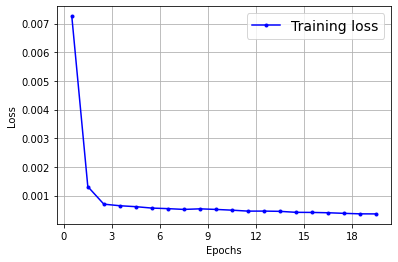

In [32]:
def plot_learning_curves(loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    # plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"])
plt.show()

In [21]:
# construct the dataset for prediction
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [22]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [23]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [26]:
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [27]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]

valid_data

,Close
Date,
2014-07-02,174.35
2014-07-03,169.2
2014-07-04,167.85
2014-07-07,167.05
2014-07-08,158.7
...,...
2018-09-24,233.3
2018-09-25,236.1
2018-09-26,234.25


In [28]:
valid_data = valid_data.assign(Predictions=predicted_closing_price)
valid_data

,Close,Predictions
Date,,
2014-07-02,174.35,170.701721
2014-07-03,169.2,172.164993
2014-07-04,167.85,172.647980
2014-07-07,167.05,172.359604
2014-07-08,158.7,171.560806
...,...,...
2018-09-24,233.3,230.732864
2018-09-25,236.1,232.003098
2018-09-26,234.25,232.998947


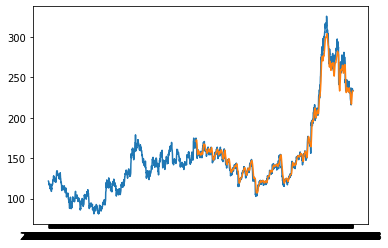

In [35]:
# print(valid_data)
plt.plot(new_dataset['Close'])
# plt.plot(train_data['Close'])
# plt.plot(valid_data['Close'])
# plt.plot(valid_data['Predictions'])
plt.plot(valid_data.index, predicted_closing_price)

In [30]:
# Calculate the MSE for predictions
from sklearn.metrics import mean_squared_error
mean_squared_error(valid_data['Close'],predicted_closing_price) 

# Increase the epoch count and retrain the network, see if MSE improves

# 66.74
# 69.52
# 34.15 - batch size: 50, epoch: 20

47.201189498092525